<a href="https://colab.research.google.com/github/sanket-rajput/100DAYS_OF_100WEBPROJECTS/blob/main/3_Build_convolutions_and_perform_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

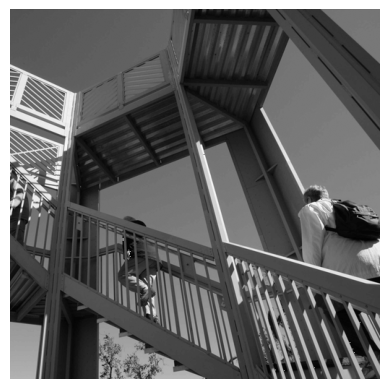

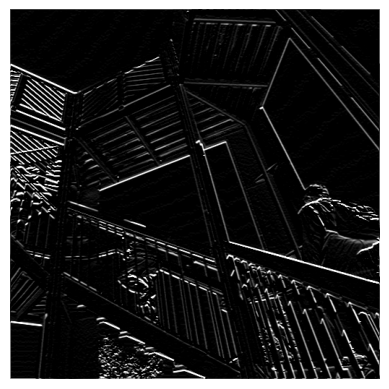

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import ascent   # works in new SciPy versions

# Load sample image (ascent)
i = ascent()

# Show original image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

# Prepare transformed image
i_transformed = np.copy(i).astype(np.float32)  # work in float
size_x, size_y = i.shape

# Define convolution kernel (filter)
# Edge detection
# kernel = [[0, 1, 0],
#           [1, -4, 1],
#           [0, 1, 0]]

# Sobel vertical edges
kernel = [[-1, -2, -1],
          [ 0,  0,  0],
          [ 1,  2,  1]]

kernel = np.array(kernel)
weight = 1.0

# Convolution
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        region = i[x-1:x+2, y-1:y+2]          # 3x3 neighborhood
        output_pixel = np.sum(region * kernel) * weight
        output_pixel = max(0, min(255, output_pixel))  # clamp
        i_transformed[x, y] = output_pixel

# Convert back to uint8
i_transformed = i_transformed.astype(np.uint8)

# Show result
plt.gray()
plt.axis('off')
plt.imshow(i_transformed)
plt.show()


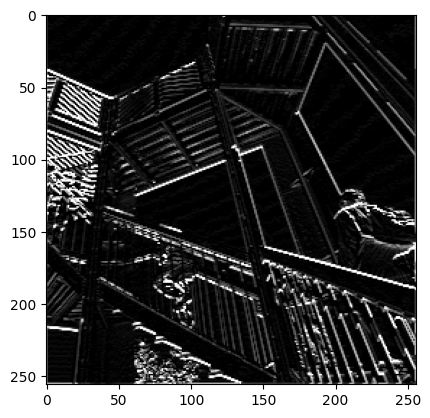

In [18]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()